In [3]:
som_features = [
    "Sample", "Gene", "Chr", "Start", "End", "Ref", "Alt",
    "Var1Depth", "Var1AltDepth", "Var1RefFwdReads", "Var1RefRevReads", "Var1AltFwdReads", "Var1AltRevReads", "Var1Genotype", "Var1AF",
    "Var1Bias", "Var1PMean", "Var1PStd", "Var1QMean", "Var1QStd", "Var1MQ", "Var1Sig_Noise", "Var1HiAF", "Var1ExtraAF", "Var1NM", "Var1Pvalue", "Var1Oddr",
    "Var2Depth", "Var2AltDepth", "Var2RefFwdReads", "Var2RefRevReads", "Var2AltFwdReads", "Var2AltRevReads", "Var2Genotype", "Var2AF",
    "Var2Bias", "Var2PMean", "Var2PStd", "Var2QMean", "Var2QStd", "Var2MQ", "Var2Sig_Noise", "Var2HiAF", "Var2ExtraAF", "Var2NM", "Var2Pvalue", "Var2Oddr",
    "shift3", "MSI", "MSI_NT", "5pFlankSeq", "3pFlankSeq", "Seg", "VarLabel", "VarType",
    "Duprate1", "SV_info1", "Duprate2", "SV_info2", "Pvalue", "Oddratio"
    ]
som_features_to_index = {
    "Sample":0, "Gene":1, "Chr":2, "Start":3, "End":4, "Ref":5, "Alt":6,
    "Var1Depth":7, "Var1AltDepth":8, "Var1RefFwdReads":9, "Var1RefRevReads":10, "Var1AltFwdReads":11, "Var1AltRevReads":12, "Var1Genotype":13, "Var1AF":14,
    "Var1Bias":15, "Var1PMean":16, "Var1PStd":17, "Var1QMean":18, "Var1QStd":19, "Var1MQ":20, "Var1Sig_Noise":21, "Var1HiAF":22, "Var1ExtraAF":23, "Var1NM":24, "Var1Pvalue":25, "Var1Oddr":26,
    "Var2Depth":27, "Var2AltDepth":28, "Var2RefFwdReads":29, "Var2RefRevReads":30, "Var2AltFwdReads":31, "Var2AltRevReads":32, "Var2Genotype":33, "Var2AF":34,
    "Var2Bias":35, "Var2PMean":36, "Var2PStd":37, "Var2QMean":38, "Var2QStd":39, "Var2MQ":40, "Var2Sig_Noise":41, "Var2HiAF":42, "Var2ExtraAF":43, "Var2NM":44, "Var2Pvalue":45, "Var2Oddr":46,
    "shift3":47, "MSI":48, "MSI_NT":49, "5pFlankSeq":50, "3pFlankSeq":51, "Seg":52, "VarLabel":53, "VarType":54,
    "Duprate1":55, "SV_info1":56, "Duprate2":57, "SV_info2":58, "Pvalue":59, "Oddratio":60
    }
som_selected_features = [
    "Var1Depth", "Var1AltDepth", "Var1RefFwdReads", "Var1RefRevReads", "Var1AltFwdReads", "Var1AltRevReads", "Var1AF",
    "Var1PMean", "Var1PStd", "Var1QMean", "Var1QStd", "Var1MQ", "Var1Sig_Noise", "Var1HiAF", "Var1ExtraAF", "Var1NM", "Var1Pvalue", "Var1Oddr",
    "Var2Depth", "Var2AltDepth", "Var2RefFwdReads", "Var2RefRevReads", "Var2AltFwdReads", "Var2AltRevReads", "Var2AF",
    "Var2PMean", "Var2PStd", "Var2QMean", "Var2QStd", "Var2MQ", "Var2Sig_Noise", "Var2HiAF", "Var2ExtraAF", "Var2NM", "Var2Pvalue", "Var2Oddr",
    "shift3", "MSI", "MSI_NT",
    "Pvalue", "Oddratio"
    ]
SOM_SNV_FEATURES = len(som_selected_features) + 1
SOM_INDEL_FEATURES = SOM_SNV_FEATURES + 3

In [121]:
type_to_label = {"SNV": 0, "Deletion": 1, "Insertion": 2, "Complex": 3}
varLabel_to_label = {
    "Germline":0, "StrongLOH":1, "LikelyLOH":2, "StrongSomatic":3, 
    "LikelySomatic":4, "AFDiff":5, "SampleSpecific":6
}
fe2i = som_features_to_index
fvc_sf = som_selected_features
def format_snv_data_item(jri, fisher):
    if not fisher:
        print("not support to train if you not run rabbitvar without --fiser!!")
        exit(-1)
    data = list()
    # key is chrom:pos like "chr1:131022:A:T"
    key = jri[2] + ":" + jri[3] + ":" + jri[5] + ":" + jri[6] #TODO: case sensitive
    for sf in fvc_sf:
        data.append(jri[fe2i[sf]])
    data.append(varLabel_to_label[jri[fe2i["VarLabel"]]])#varlabel
    #data.append(jri[fe2i["VarLabel"]])
    if len(data) != SOM_SNV_FEATURES:
        print("fvc data length error: \n", len(data), data, " ori\n", jri)
        exit(-1)
    return key, data


In [122]:
#---------------------------------indel processing function------------------------------------------#
def format_indel_data_item(jri, fisher):
    if not fisher:
        print("not support to train if you not run rabbitvar without --fiser!!")
        exit(-1)
    data = list()
    # key is chrom:pos like "chr1:131022:A:T"
    key = jri[2] + ":" + jri[3] + ":" + jri[5] + ":" + jri[6] #TODO: case sensitive
    data.append(len(jri[5]))
    data.append(len(jri[6]))
    data.append(type_to_label[jri[fe2i["VarType"]]])
    for sf in fvc_sf:
        data.append(jri[fe2i[sf]])
    data.append(varLabel_to_label[jri[fe2i["VarLabel"]]])#varlabel
    #data.append(jri[fe2i["VarLabel"]])
    if len(data) != SOM_INDEL_FEATURES:
        print("fvc data length error: \n", len(data), data, " ori\n", jri)
        exit(-1)
    return key, data

In [123]:
def get_label(truth_vars, key):
    if key in truth_vars:
        return 1
    else :
        return 0
    return 0

In [124]:
#----prepare label list----#
truth_file = "/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_1.indel.vcf"
truth_vars = set()
with open(truth_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.split('\t')
        chrom, pos, id, ref, alt, _, filter = items[:7]         
        #if len(chrom) < 6 and filter == "PASS" and (len(ref) > 1 or len(alt) > 1) :
        if len(chrom) < 6:
            site = chrom + ":" + pos + ":" + ref + ":" + alt
            truth_vars.add(site)

In [125]:
len(truth_vars)

1916

In [126]:
#--- prepare source datafram from file ---#
import sys
from multiprocessing import Process, Queue
import pandas as pd
import numpy as np
fastvc_file = "/home/old_home/haoz/workspace/FastVC/detection_result/FD_DATASET/FD_DATA_1.txt"
cr = list()
with open(fastvc_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.strip().split('\t')
        if(len(items) == 61): #36 or 38(fisher)
            if items[fe2i["VarType"]] == "SNV": #judge if snv
                continue
            key, data = format_indel_data_item(items, True)
            label = get_label(truth_vars, key)
            cr.append([*data, label])
        else:
            print("wrong data format!!", len(items))
                
data = pd.DataFrame(cr, columns=["RefLength", "AltLength", "VarType", *som_selected_features, "VarLabel", "label"])

In [127]:
%%time
data[data.columns[:-2]] = data[data.columns[:-2]].apply(pd.to_numeric)
data.head()


CPU times: user 1min 14s, sys: 13.6 s, total: 1min 28s
Wall time: 1min 28s


,RefLength,AltLength,VarType,Var1Depth,Var1AltDepth,Var1RefFwdReads,Var1RefRevReads,Var1AltFwdReads,Var1AltRevReads,Var1AF,...,Var2NM,Var2Pvalue,Var2Oddr,shift3,MSI,MSI_NT,Pvalue,Oddratio,VarLabel,label
0,1,4,2,50,20,11,18,6,14,0.400000,...,0.000000,0.492017,0.00,0,2.0,1,1.000000,17.000000,4,0
1,2,1,1,30,8,7,15,2,6,0.266667,...,0.000000,1.000000,0.00,2,3.0,1,0.999175,10.909091,4,0
2,1,2,2,62,23,14,25,8,15,0.370968,...,1.066667,1.000000,1.14,0,1.0,1,0.949675,1.769231,0,0
3,2,1,1,45,17,13,15,8,9,0.377778,...,0.700000,1.000000,1.05,0,13.0,1,0.962598,2.064286,0,0
4,1,5,2,94,12,78,0,12,0,0.127660,...,1.748718,1.000000,0.00,6,3.0,1,0.617161,1.035647,0,0


In [1]:
%%time
import pandas as pd
# --------------------------------------- load data by csv file -----------------------------------#
data = pd.read_csv("/home/old_home/haoz/workspace/FastVC/RandomForest/uniform_data.tsv", header=None)

CPU times: user 15.2 s, sys: 20.6 s, total: 35.8 s
Wall time: 8min 33s


In [7]:
data.columns = ["RefLength", "AltLength", "VarType", *som_selected_features, "VarLabel", "label"]
data.head()

ValueError: Length mismatch: Expected axis has 47 elements, new values have 46 elements

In [6]:
%%time
#------------------------------------------ data prepare ------------------------------------------#
import numpy as np
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
#data.rename(columns={0:'input',1:'label'},inplace=True)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= .9
train, test = data[data['is_train'] == True], data[data['is_train'] == False]

#--select 1/100 faslse data form fasle 
false = train[ train['label'] == 0 ]
print("false number => ", len(false))
false = false.sample(frac = 0.05)
print("after filter, false number => ", len(false))
truth = train[ train['label'] == 1]
print("truth number => ", len(truth))
aug_data = shuffle(pd.concat([truth, false, truth, truth, truth, truth], axis = 0))
#aug_data = shuffle(pd.concat([truth, false], axis = 0))
print("in training, faslse number: {}, truth number: {}".format(len(false), len(truth) * 5) )
#aug_data = train

clf = RandomForestClassifier(n_jobs=-1, max_depth=12, min_samples_leaf=50, 
                             class_weight='balanced',
                             n_estimators=50, max_features=None, verbose=1)

#train_set = np.asarray(list(map(lambda x: np.asarray(x), aug_data["input"])))
train_set = aug_data[aug_data.columns[:-2]]
y, _ = pd.factorize(aug_data["label"])
print(len(train_set), len(y))

false number =>  4565504
after filter, false number =>  228275
truth number =>  8950
in training, faslse number: 228275, truth number: 44750
273025 273025
CPU times: user 1.79 s, sys: 11.1 s, total: 12.9 s
Wall time: 15 s


In [138]:
# train_set.head()
# pd.plotting.andrews_curves(aug_data, "label", color = ('green', 'red'))
# pd.plotting.parallel_coordinates(aug_data, 'label', color=('green', 'red'))
# pd.plotting.radviz(aug_data, "label")

In [139]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(train_set[train_set.columns])
print(train_set.columns)
print(pca.explained_variance_ratio_)
total_ratio = 0
for i in pca.explained_variance_ratio_:
    total_ratio += i
print(total_ratio)
print(pca.explained_variance_)
train_set_reduction = pca.transform(train_set)
train_set_reduction[:5]
'''

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=3)\npca.fit(train_set[train_set.columns])\nprint(train_set.columns)\nprint(pca.explained_variance_ratio_)\ntotal_ratio = 0\nfor i in pca.explained_variance_ratio_:\n    total_ratio += i\nprint(total_ratio)\nprint(pca.explained_variance_)\ntrain_set_reduction = pca.transform(train_set)\ntrain_set_reduction[:5]\n'

In [140]:
#--- train
clf.fit(train_set, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    5.7s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:   12.6s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.9s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent w

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent w

[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaini

[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaini

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  50 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent w

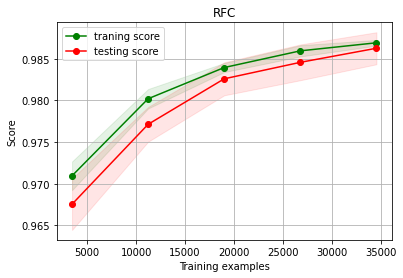

In [102]:

# 定义函数 plot_learning_curve 绘制学习曲线。train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),cv 初始化为 10，以后调用函数时不再输入这两个变量
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(RandomForestClassifier(n_jobs=-1, max_depth=12, min_samples_leaf=50, class_weight='balanced',
                            n_estimators=50, max_features=None, verbose=1), 'RFC', train_set, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线
                


In [141]:
#--- test
#test_set = np.asarray(list(map(lambda x: np.asarray(x), test["input"])))
test_set = test[test.columns[:-2]]
#test_set_reduction = pca.transform(test_set)
ytest, _ = pd.factorize(test["label"])
ypred = clf.predict(test_set)

print("model score: ", clf.score(test_set, ytest))
x = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])
recall_rate = x[1][1] / (x[1][0] + x[1][1])
prec_rate = x[1][1] / (x[0][1] + x[1][1])
print("racall is: ", recall_rate, "prec is:", prec_rate)
x

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.


model score:  0.9889833945698334
racall is:  0.08598409542743539 prec is: 0.9558011049723757


[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.1s finished


preds,0,1
acture,,
0,165636,1839
1,8,173


In [142]:
#---- store modle ----#
# import pickle

# with open("./models/ramdom_forest_model.pkl", "wb") as f:
#     pickle.dump(clf, f)

import joblib
joblib.dump(clf, './models/random_forest_model_somatic_indel_0d02_balanced.pkl', compress=9) 

['./models/random_forest_model_somatic_indel_0d02_balanced.pkl']

In [148]:

#------------- use trained model to filter variants ----------------------#

import joblib
import numpy as np
import pandas as pd
out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/somatic/train_set_10_21/FDSynthetic.notloose.txt"
#out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/FD_DATASET/FD_DATA_2.txt"
#out_file = "/home/old_home/haoz/workspace/FastVC/detection_result/SJZP/B1701_B17NC.txt"
cr = list()
fisher = True
raw = list()
with open(out_file, 'r') as f:
    for var in f:
        if var[0] == '#':
            continue
        items = var.strip().split('\t')
        if(len(items) == 61): #36 or 38(fisher)
            if items[fe2i["VarType"]] == "SNV": #judge if snv
                continue
            key, data_line = format_indel_data_item(items, True)
            cr.append(data_line)
            raw.append(var)
        else:
            print("wrong data format!!", len(items))
            
if fisher:                
    clf = joblib.load("/home/old_home/haoz/workspace/FastVC/RandomForest/models/random_forest_model_somatic_indel_0d02_balanced.pkl")

call_data = np.asarray(cr)
pred = clf.predict(call_data)


'''
ypred = clf.predict(test_set)
x = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])
correct_rate = x[0][1] / (x[0][1] + x[1][1])
print("error_rate is: ", correct_rate)
x
'''

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  22 out of  50 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=40)]: Done  50 out of  50 | elapsed:    0.6s finished


'\nypred = clf.predict(test_set)\nx = pd.crosstab(ytest, ypred, rownames=["acture"], colnames=["preds"])\ncorrect_rate = x[0][1] / (x[0][1] + x[1][1])\nprint("error_rate is: ", correct_rate)\nx\n'

In [149]:
with open("./RandomForest_Filtered.txt", 'w') as f:
    for i in range(len(pred)):
        if pred[i] == 1:
            f.write(str(raw[i]))

In [150]:
!cat ./RandomForest_Filtered.txt | /home/old_home/haoz/workspace/FastVC/scripts/var2vcf_paired.pl -A -f 0.01 > RandomForest_Filtered.vcf

In [151]:
! /home/old_home/haoz/tools/happy/bin/som.py \
    /home/old_home/haoz/workspace/data/FD/trainingSet_10_21/synthetic_indels.leftAlign.vcf \
	/home/old_home/haoz/workspace/FastVC/RandomForest/RandomForest_Filtered.vcf \
	-o tmp.indel \
	-r /home/old_home/haoz/workspace/data/hg38/hg38.fa \
	--verbose 2> /dev/null \
&& echo "FD data indel result:" \
&& head -n 3 tmp.indel.stats.csv | column -s, -t -H 8,9,11,12,13,15,16,17,18,19,20,21,22 


FD data indel result:
   type     total.truth  total.query  tp    fp    fn    recall              precision
0  indels   7487         11904        5224  6680  2263  0.6977427541071191  0.4388440860215054
5  records  7487         11971        5224  6747  2263  0.6977427541071191  0.43638793751566285


In [147]:
! ls /home/old_home/haoz/workspace/FastVC/RandomForest/models/

automl_model_full_python.pkl
automl_model.pkl
model_desc.org
ramdom_forest_model_fisher.pkl
ramdom_forest_model_somatic.pkl
ramdom_forest_model_somatic_test0d001.pkl
ramdom_forest_model_somatic_test0d01.pkl
ramdom_forest_model_somatic_test0d02.pkl
ramdom_forest_model_somatic_test0d1.pkl
ramdom_forest_model_somatic_test.pkl
random_forest_model_somatic_indel0d005.pkl
random_forest_model_somatic_indel_0d02_balanced.pkl
random_forest_model_somatic_indel0d02.pkl
random_forest_model_somatic_indel_balanced.pkl
tmp.pkl


In [ ]:
	/home/old_home/haoz/workspace/data/FD/Truth/FDtruth_Data_2.snv.vcf \
    /home/old_home/haoz/workspace/data/FD/trainingSet_10_21/synthetic_snvs.vcf \